In [111]:
!pip install seaborn

## State of the art (ROAD, sort base ranking and linear noisy imputation notrain method)

In [148]:

notretrain_threshold_linear = "/workspaces/outputs/road_8_exp_mothods/threshold/results/noretrain.json"


In [149]:
import json
import pandas as pd
import numpy as np

In [150]:
with open(notretrain_threshold_linear) as json_file:
    notretrain_threshold_linear = json.load(json_file)

In [190]:
def averaging_accuracy(dict_result):
    import copy
    dictionary = copy.deepcopy(dict_result)
    for method in dictionary['imputations']:
        for key_m, value_m in dictionary[method].items():
            for key_sb, value_ac in value_m.items():
                for key_f, value_f in  value_ac.items():                  
                    for key_p, value_ar in value_f.items():
                        value_f[key_p] = sum(value_ar)/len(value_ar)
    return dictionary

In [189]:
import numpy
def rankdata(numbers , morf=True):
    array = numpy.array(numbers)
    if not morf:
        array = 1 - array
    temp = array.argsort()
    ranks = numpy.empty_like(temp)
    ranks[temp] = numpy.arange(len(array)) + 1
    return ranks

In [188]:
def ranker(data_dict, appraoch="zero", morf=True, path=None, items=["ig", "gb"]):
    import copy
    if morf:
        method = 'MoRF'
    else:
        method ='LeRF'
    printable_data_dict = copy.deepcopy(data_dict)
    new_dict = {}
    ranked_dict = {}
    new_dict['x_axis'] = printable_data_dict["percentages"]
    for key_m,  val_m in printable_data_dict[appraoch].items():
        if key_m in items:
            for key_var, val_var in val_m.items():
                if not morf:
                    accs = val_var['lerf']
                    l = list(accs.values())
                    new_dict[f"{key_m}-{key_var}"] = l
                else:
                    accs = val_var['morf']
                    new_dict[f"{key_m}-{key_var}"] = list(accs.values())
    x = new_dict["x_axis"]
    del(new_dict["x_axis"])
    
        
    count = 0
    for each in x:
        list_item = []
        for k, v in new_dict.items():

            list_item.append(v[count])
        ranked_dict[each] = rankdata(list_item, morf=morf)
        count+=1
    
    return ranked_dict

In [178]:
def plot_consistancy( data_dict, appraoch="zero", morf=True, path=None, items=["ig","gb"]):
    import seaborn as sns
    import copy
    if morf:
        method = 'MoRF'
    else:
        method ='LeRF'
    printable_data_dict = copy.deepcopy(data_dict)
    new_dict = {}
    new_dict['x_axis'] = printable_data_dict["percentages"]
    for key_m,  val_m in printable_data_dict[appraoch].items():
        if key_m in items:
            for key_var, val_var in val_m.items():
                if not morf:
                    accs = val_var['lerf']
                    l = list(accs.values())
                    new_dict[f"{key_m}-{key_var}"] = l

                else:
                    accs = val_var['morf']
                    new_dict[f"{key_m}-{key_var}"] = list(accs.values())
                 

    import seaborn as sns
    sns.set_theme(style="whitegrid")

    data = pd.DataFrame.from_dict(new_dict)
    data = data.set_index('x_axis')

    ax = sns.lineplot(data=data, palette="tab10", linewidth=2.5)
    ax.set(ylim=(0.0, 1))
    ax.set(xlim=(0.0, 1))
    ax.set(xlabel=f'Threshold reference {method}', ylabel='Accuracy')
    ax.figure.savefig(f'{path}/{appraoch}-{method}.png')
    ax.figure.clf()




In [184]:
from scipy.stats import spearmanr
def calculate_spearman_morf_lerf(morf, lerf):
    scores =[]
    for ind in morf.keys():
        score = spearmanr(morf[ind], lerf[ind]).correlation
        scores.append(score)
    return scores


In [185]:
def calculate_correlation(accuracy_result, method= "telea"):
    scores = {}
    from scipy.stats.stats import pearsonr   
    for key_m,  val_m in accuracy_result[method].items():
        for key_var, val_var in val_m.items():
                morf = list(val_var["morf"].values())
                lerf =  list(val_var["lerf"].values())
                lerf.reverse()
                lerf = 1 - np.array(lerf)
                scores[key_var] = pearsonr(morf,lerf)

    return scores

In [186]:
def show_images(path):
    from PIL import Image
    import glob
    images = glob.glob(f'{path}/*.png')
    for im in images:
        im = Image.open(im)
        display(im)



In [161]:

averaged_accuracy_threshold_linear = averaging_accuracy(notretrain_threshold_linear)

## Liner fixed

## Threshold (Linear)

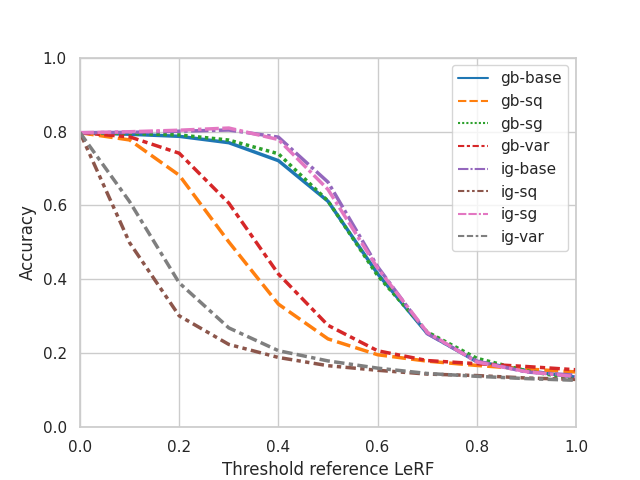

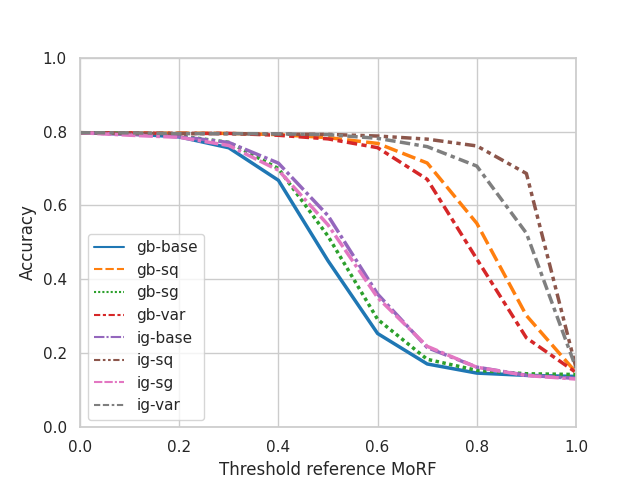

<Figure size 640x480 with 0 Axes>

In [181]:
plot_consistancy(averaged_accuracy_threshold_linear, morf=False, appraoch="linear", path=f'/workspaces/outputs/road_8_exp_mothods/threshold/plots')
show_images(f'/workspaces/outputs/road_8_exp_mothods/threshold/plots')

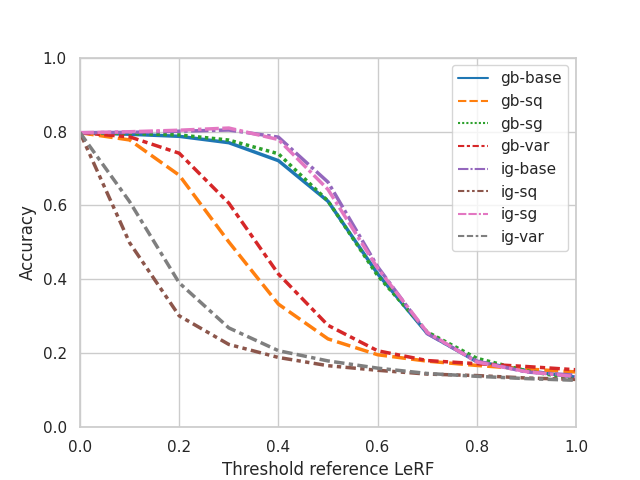

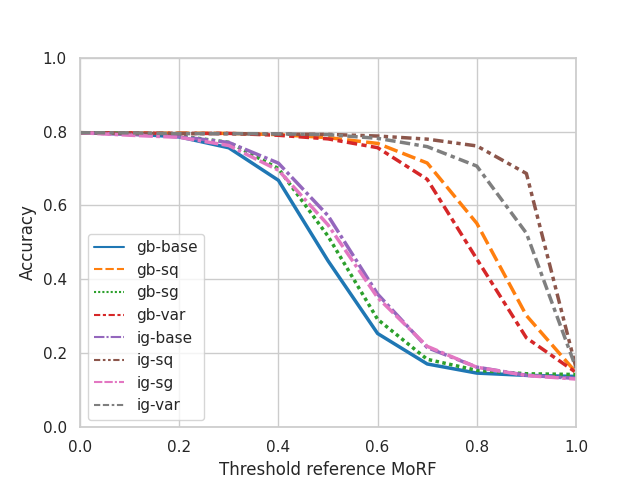

<Figure size 640x480 with 0 Axes>

In [167]:
plot_consistancy(averaged_accuracy_threshold_linear, morf=True, appraoch="linear", path=f'/workspaces/outputs/road_8_exp_mothods/threshold/plots')
show_images(f'/workspaces/outputs/road_8_exp_mothods/threshold/plots')

In [195]:
ranking_lerf = ranker(averaged_accuracy_threshold_linear, morf=False, appraoch="telea")

ranking_morf = ranker(averaged_accuracy_threshold_linear, morf=True, appraoch="telea")
import numpy as np
score = calculate_spearman_morf_lerf(ranking_lerf, ranking_morf)
print(f"Spearman rank correlation is:{np.mean(score)}")


Spearman rank correlation is:0.7316017316017317


## Threshold (telea)

In [ ]:
ranking_lerf = ranker(averaged_accuracy_threshold_linear, morf=False, appraoch="telea")

ranking_morf = ranker(averaged_accuracy_threshold_linear, morf=True, appraoch="telea")
import numpy as np
score = calculate_spearman_morf_lerf(ranking_lerf, ranking_morf)
print(f"Spearman rank correlation is:{np.mean(score)}")

## Threshold (NS)

In [ ]:
ranking_lerf = ranker(averaged_accuracy_threshold_linear, morf=False, appraoch="telea")

ranking_morf = ranker(averaged_accuracy_threshold_linear, morf=True, appraoch="telea")
import numpy as np
score = calculate_spearman_morf_lerf(ranking_lerf, ranking_morf)
print(f"Spearman rank correlation is:{np.mean(score)}")